# Load data 

In [1]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from parse_logs.parse_base import LogDir
from parse_logs.extract_experiment_result import parse_experiment_result
from parse_logs.parse_coordinator_logs import read_design

from parse_logs.parse_coordinator_logs import get_flat_design
from flatten_json import flatten

sns.set(rc={"figure.figsize":(16, 8)})
# parser.root_data_path = '../tests/data'
#trial_run_objects = parser.get_trial_runs(
#    exp_run_code='experiment_2021_04_01_16_20_00_run_1')

LogDir.base_data_path = '../data'
trial_run_objects = parse_experiment_result(exec_code='experiment_2021_07_29_15_33_17_run_1')

# load trials run to dict (it can take a while)
# sort and instantiate a dataframe
trial_run_dicts = [trial_run.to_dict() for trial_run in trial_run_objects]
# trial_run_dicts

ignoring "trial.log, wrong name format"
ignoring "trial.log, wrong name format"
ignoring "trial.log, wrong name format"
ignoring "trial.log, wrong name format"
ignoring "trial.log, wrong name format"
ignoring "trial.log, wrong name format"
ignoring "trial.log, wrong name format"
ignoring "trial.log, wrong name format"


In [2]:
trial_run_dicts.sort( key=lambda tr: tr['exec_group']+tr['code'])
# trial_run_dicts

trial_run_df = pd.DataFrame.from_records(trial_run_dicts)
trial_run_df

,exec_group,scenario_id,code,treatment,executor,ttc,failure_time,end_state,total_time_wall_clock,has_failure
0,les-01,1,aaaaab,None,turtlebot4,NaN,155.27,low-battery,223.21,True
1,les-01,1,aaaaap,None,turtlebot2,421.43,NaN,success,646.63,False
2,les-01,2,aaaabb,None,turtlebot6,NaN,101.03,no-skill,170.18,True
3,les-01,2,aaaabp,None,turtlebot2,394.38,NaN,success,602.57,False
4,les-01,3,aaaacb,None,turtlebot6,NaN,69.28,no-skill,123.12,True
...,...,...,...,...,...,...,...,...,...,...
1291,les-08,79,acccap,None,turtlebot3,335.07,NaN,success,515.50,False
1292,les-08,80,acccbb,None,turtlebot3,430.25,NaN,success,653.62,False
1293,les-08,80,acccbp,None,turtlebot6,211.20,NaN,success,313.30,False
1294,les-08,81,accccb,None,turtlebot2,222.02,NaN,success,331.32,False


In [3]:
exp_design = get_flat_design(exec_code='experiment_2021_07_29_15_33_17_run_1')
td_df = pd.DataFrame.from_records(exp_design)
td_df = td_df.set_index('code')

td_df

,scenario_id,factors_avg_speed,factors_battery_charge,factors_battery_discharge_rate,factors_location,factors_skills,treatment
code,,,,,,,
aaaaab,1,a,a,a,a,a,baseline
aaaaap,1,a,a,a,a,a,planned
aaaabb,2,a,a,a,b,a,baseline
aaaabp,2,a,a,a,b,a,planned
aaaacb,3,a,a,a,c,a,baseline
...,...,...,...,...,...,...,...
acccap,79,a,c,c,a,c,planned
acccbb,80,a,c,c,b,c,baseline
acccbp,80,a,c,c,b,c,planned


In [4]:
trial_run_df  = trial_run_df.drop(['treatment'], axis=1).join(td_df.drop(['scenario_id'], axis=1), on='code', lsuffix='_left', rsuffix='_right')
trial_run_df

,exec_group,scenario_id,code,executor,ttc,failure_time,end_state,total_time_wall_clock,has_failure,factors_avg_speed,factors_battery_charge,factors_battery_discharge_rate,factors_location,factors_skills,treatment
0,les-01,1,aaaaab,turtlebot4,NaN,155.27,low-battery,223.21,True,a,a,a,a,a,baseline
1,les-01,1,aaaaap,turtlebot2,421.43,NaN,success,646.63,False,a,a,a,a,a,planned
2,les-01,2,aaaabb,turtlebot6,NaN,101.03,no-skill,170.18,True,a,a,a,b,a,baseline
3,les-01,2,aaaabp,turtlebot2,394.38,NaN,success,602.57,False,a,a,a,b,a,planned
4,les-01,3,aaaacb,turtlebot6,NaN,69.28,no-skill,123.12,True,a,a,a,c,a,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,les-08,79,acccap,turtlebot3,335.07,NaN,success,515.50,False,a,c,c,a,c,planned
1292,les-08,80,acccbb,turtlebot3,430.25,NaN,success,653.62,False,a,c,c,b,c,baseline
1293,les-08,80,acccbp,turtlebot6,211.20,NaN,success,313.30,False,a,c,c,b,c,planned
1294,les-08,81,accccb,turtlebot2,222.02,NaN,success,331.32,False,a,c,c,c,c,baseline


## Baseline

In [5]:
baseline_df = trial_run_df[trial_run_df.treatment == 'baseline']
baseline_df

,exec_group,scenario_id,code,executor,ttc,failure_time,end_state,total_time_wall_clock,has_failure,factors_avg_speed,factors_battery_charge,factors_battery_discharge_rate,factors_location,factors_skills,treatment
0,les-01,1,aaaaab,turtlebot4,NaN,155.27,low-battery,223.21,True,a,a,a,a,a,baseline
2,les-01,2,aaaabb,turtlebot6,NaN,101.03,no-skill,170.18,True,a,a,a,b,a,baseline
4,les-01,3,aaaacb,turtlebot6,NaN,69.28,no-skill,123.12,True,a,a,a,c,a,baseline
6,les-01,4,aaabab,turtlebot5,490.72,NaN,success,680.66,False,a,a,a,a,b,baseline
8,les-01,5,aaabbb,turtlebot6,208.30,NaN,success,296.29,False,a,a,a,b,b,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,les-08,77,accbbb,turtlebot1,NaN,137.78,no-skill,217.20,True,a,c,c,b,b,baseline
1288,les-08,78,accbcb,None,NaN,15.15,no-skill,41.04,True,a,c,c,c,b,baseline
1290,les-08,79,acccab,turtlebot3,406.70,NaN,success,609.59,False,a,c,c,a,c,baseline
1292,les-08,80,acccbb,turtlebot3,430.25,NaN,success,653.62,False,a,c,c,b,c,baseline


# Planned

In [6]:
planned_df = trial_run_df[trial_run_df.treatment == 'planned']
planned_df

,exec_group,scenario_id,code,executor,ttc,failure_time,end_state,total_time_wall_clock,has_failure,factors_avg_speed,factors_battery_charge,factors_battery_discharge_rate,factors_location,factors_skills,treatment
1,les-01,1,aaaaap,turtlebot2,421.43,NaN,success,646.63,False,a,a,a,a,a,planned
3,les-01,2,aaaabp,turtlebot2,394.38,NaN,success,602.57,False,a,a,a,b,a,planned
5,les-01,3,aaaacp,turtlebot2,213.23,NaN,success,320.31,False,a,a,a,c,a,planned
7,les-01,4,aaabap,turtlebot6,331.75,NaN,success,486.47,False,a,a,a,a,b,planned
9,les-01,5,aaabbp,turtlebot6,204.15,NaN,success,315.29,False,a,a,a,b,b,planned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,les-08,77,accbbp,turtlebot6,209.98,NaN,success,306.30,False,a,c,c,b,b,planned
1289,les-08,78,accbcp,turtlebot6,185.38,NaN,success,275.27,False,a,c,c,c,b,planned
1291,les-08,79,acccap,turtlebot3,335.07,NaN,success,515.50,False,a,c,c,a,c,planned
1293,les-08,80,acccbp,turtlebot6,211.20,NaN,success,313.30,False,a,c,c,b,c,planned


In [7]:
# Average TCC

planned_ttc_avg = planned_df['ttc'].mean()
planned_ttc_avg

268.49532258064517

In [8]:
# by machine (no trial run dummy aparece o mesmo porque a pasta foi copiada)
(planned_df[planned_df.exec_group == 'les-01']['ttc'].mean(),
planned_df[planned_df.exec_group == 'les-03']['ttc'].mean(),
planned_df[planned_df.exec_group == 'les-04']['ttc'].mean(),
planned_df[planned_df.exec_group == 'les-05']['ttc'].mean(),
planned_df[planned_df.exec_group == 'les-06']['ttc'].mean(),
planned_df[planned_df.exec_group == 'les-07']['ttc'].mean(),
planned_df[planned_df.exec_group == 'les-08']['ttc'].mean())

(279.39690140845073,
 263.3765671641791,
 270.1132857142857,
 267.5704109589041,
 270.819696969697,
 265.1230882352941,
 270.3883333333333)

In [9]:
# comparing factors (no dummy os fatores não foram distinguidos, porque teria que renomear os arquivos)
[(planned_df[planned_df.factors_battery_charge == 'a']['ttc'].mean(),
 planned_df[planned_df.factors_battery_charge == 'b']['ttc'].mean(),
 planned_df[planned_df.factors_battery_charge == 'c']['ttc'].mean()),

(planned_df[planned_df.factors_battery_discharge_rate == 'a']['ttc'].mean(),
 planned_df[planned_df.factors_battery_discharge_rate == 'b']['ttc'].mean(),
 planned_df[planned_df.factors_battery_discharge_rate == 'c']['ttc'].mean()),

(planned_df[planned_df.factors_location == 'a']['ttc'].mean(),
 planned_df[planned_df.factors_location == 'b']['ttc'].mean(),
 planned_df[planned_df.factors_location == 'c']['ttc'].mean()),

(planned_df[planned_df.factors_battery_discharge_rate == 'a']['ttc'].mean(),
 planned_df[planned_df.factors_battery_discharge_rate == 'b']['ttc'].mean(),
 planned_df[planned_df.factors_battery_discharge_rate == 'c']['ttc'].mean()),

(planned_df[planned_df.factors_skills == 'a']['ttc'].mean(),
 planned_df[planned_df.factors_skills == 'b']['ttc'].mean(),
 planned_df[planned_df.factors_skills == 'c']['ttc'].mean())]

[(278.55255434782606, 262.80322580645156, 264.2836170212766),
 (276.1551282051282, 278.09030927835056, 248.64272189349114),
 (413.8902, 239.56568627450977, 190.51696078431377),
 (276.1551282051282, 278.09030927835056, 248.64272189349114),
 (306.43392265193364, 245.90486772486776, 254.67994680851064)]

# Statistics

## Number of each event
i.e. how many times did the simulation achieve each status

In [10]:
by_end_state = trial_run_df.groupby(['end_state', 'treatment'])['end_state']
by_end_state.count()
# planned_by_end_state_df = planned_df.groupby('end_state')['end_state'].count()
# pd.merge(baseline_by_end_state_df, planned_by_end_state_df, on='end_state')

end_state     treatment
low-battery   baseline      97
              planned       35
no-skill      baseline     175
success       baseline     354
              planned      558
timeout-sim   baseline      18
              planned       43
timeout-wall  baseline       4
              planned       12
Name: end_state, dtype: int64

In [11]:
trial_run_df.groupby(['scenario_id', 'code', 'treatment'])['end_state'].value_counts()

scenario_id  code    treatment  end_state   
1            aaaaab  baseline   low-battery     7
                                timeout-wall    1
             aaaaap  planned    success         8
2            aaaabb  baseline   no-skill        8
             aaaabp  planned    success         7
                                               ..
80           acccbp  planned    success         7
                                timeout-sim     1
81           accccb  baseline   success         8
             accccp  planned    success         6
                                timeout-sim     2
Name: end_state, Length: 234, dtype: int64

## Planned

array([<AxesSubplot:title={'center':'low-battery'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'success'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'timeout-sim'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'timeout-wall'}, xlabel='scenario_id'>],
      dtype=object)

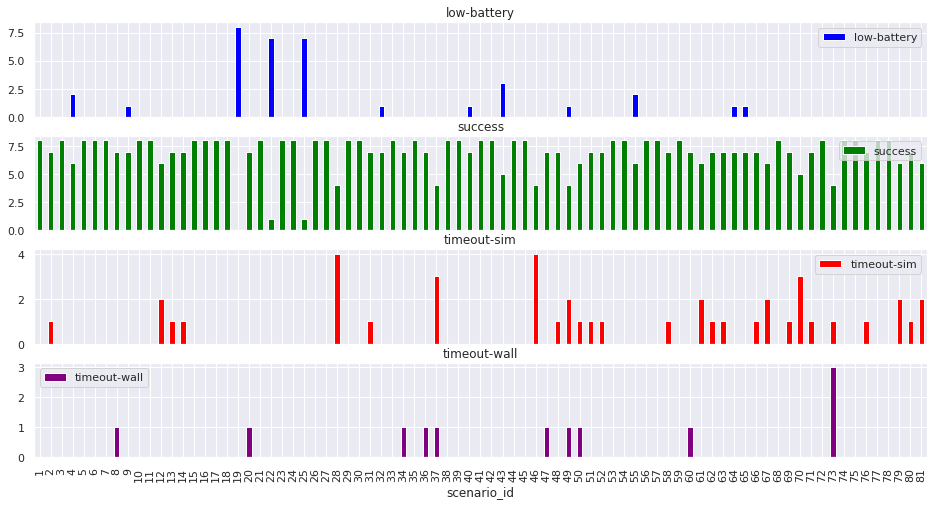

In [12]:
planned_df.groupby("scenario_id")["end_state"].value_counts().unstack().plot.bar(subplots=True, legend=True, 
                                                                              color={"success": "green", 
                                                                                     "failure-bt": "orange",
                                                                                     "low-battery": "blue",
                                                                                     "timeout-wall": "purple", 
                                                                                     "timeout-sim": "red" })

## Baseline

array([<AxesSubplot:title={'center':'low-battery'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'no-skill'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'success'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'timeout-sim'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'timeout-wall'}, xlabel='scenario_id'>],
      dtype=object)

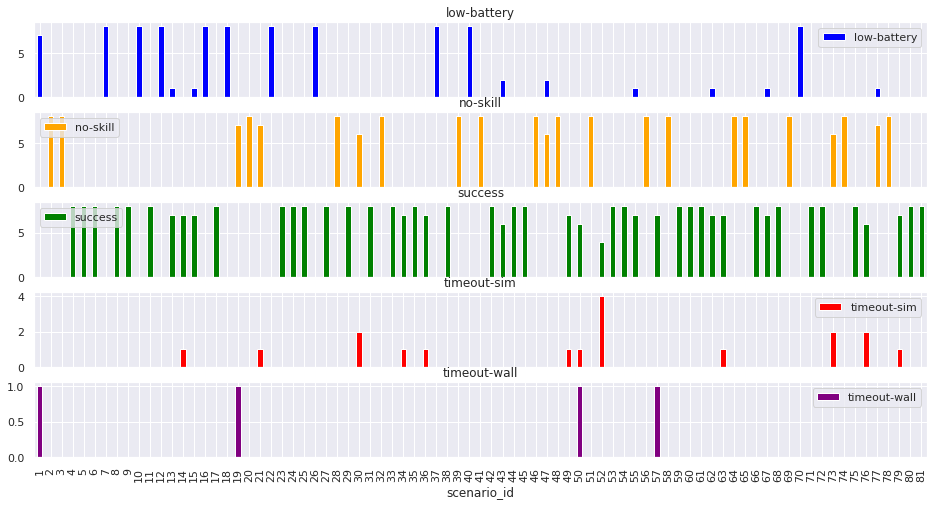

In [13]:
baseline_df.groupby("scenario_id")["end_state"].value_counts().unstack().plot.bar(subplots=True, legend=True,
                                                                               color={"success": "green", 
                                                                                      "no-skill": "orange", 
                                                                                      "timeout-sim": "red",
                                                                                      "low-battery": "blue",
                                                                                      "timeout-wall": "purple"})

## Time to Conclusion

array([<AxesSubplot:title={'center':'baseline'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'planned'}, xlabel='scenario_id'>],
      dtype=object)

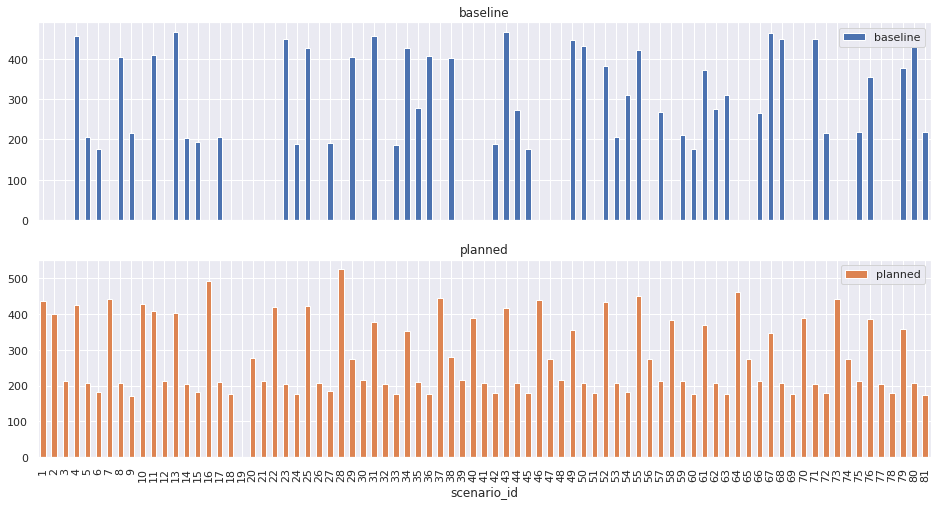

In [14]:
trial_run_df.groupby(["scenario_id", "treatment"])["ttc"].mean().unstack().plot.bar(subplots=True, legend=True)

<AxesSubplot:xlabel='scenario_id', ylabel='ttc'>

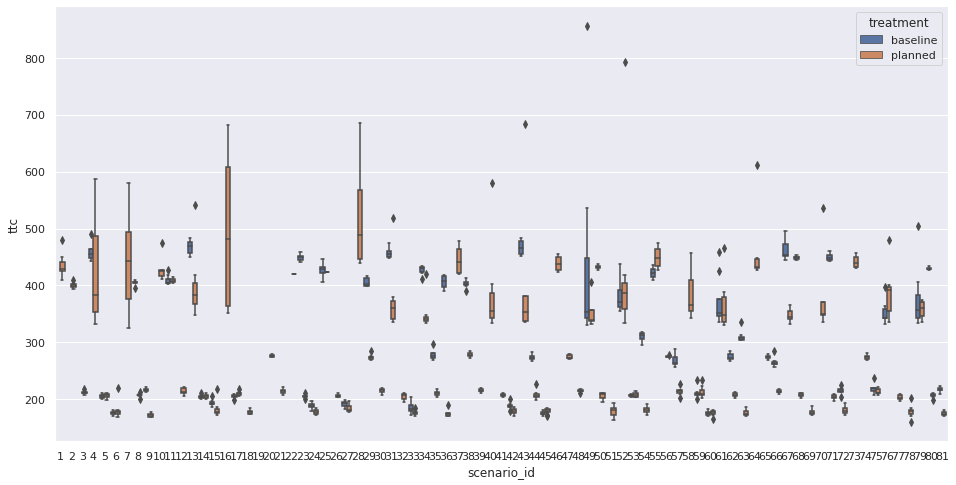

In [15]:
sns.boxplot(x="scenario_id", y="ttc", hue="treatment", data=trial_run_df)

<AxesSubplot:xlabel='scenario_id', ylabel='ttc'>

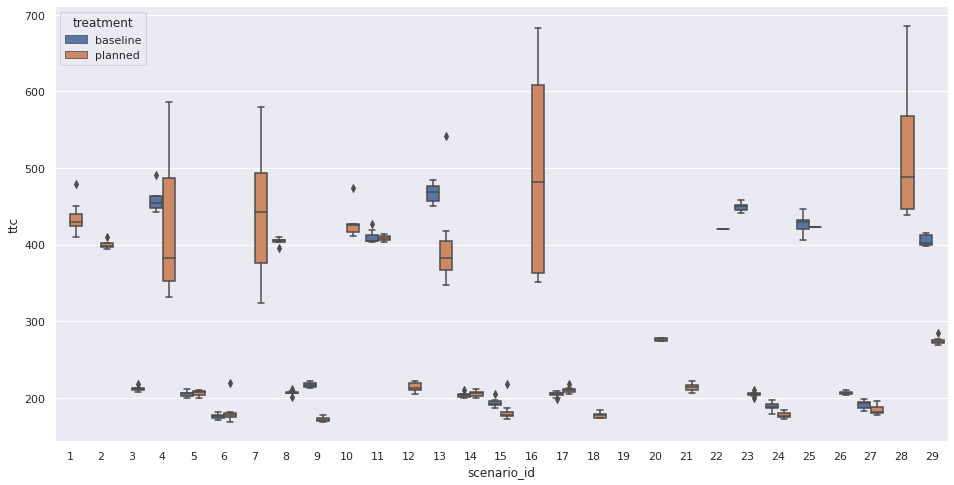

In [16]:
sns.boxplot(x="scenario_id", y="ttc", hue="treatment", data=trial_run_df[trial_run_df.scenario_id < 30])

<AxesSubplot:xlabel='scenario_id', ylabel='ttc'>

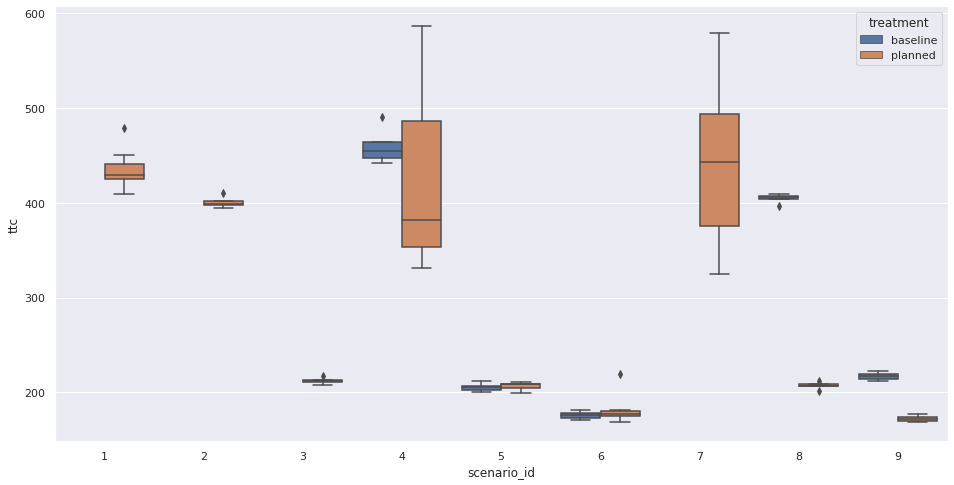

In [17]:
sns.boxplot(x="scenario_id", y="ttc", hue="treatment", data=trial_run_df[trial_run_df.scenario_id < 10])

In [18]:
trial_run_df.groupby(["scenario_id", "treatment", "executor"])['end_state'].value_counts()

scenario_id  treatment  executor    end_state  
1            baseline   turtlebot4  low-battery    7
             planned    turtlebot2  success        7
2            baseline   turtlebot6  no-skill       8
             planned    turtlebot2  success        7
                                    timeout-sim    1
                                                  ..
80           planned    turtlebot6  success        7
                                    timeout-sim    1
81           baseline   turtlebot2  success        8
             planned    turtlebot6  success        6
                                    timeout-sim    2
Name: end_state, Length: 212, dtype: int64

## STD

array([<AxesSubplot:title={'center':'baseline'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'planned'}, xlabel='scenario_id'>],
      dtype=object)

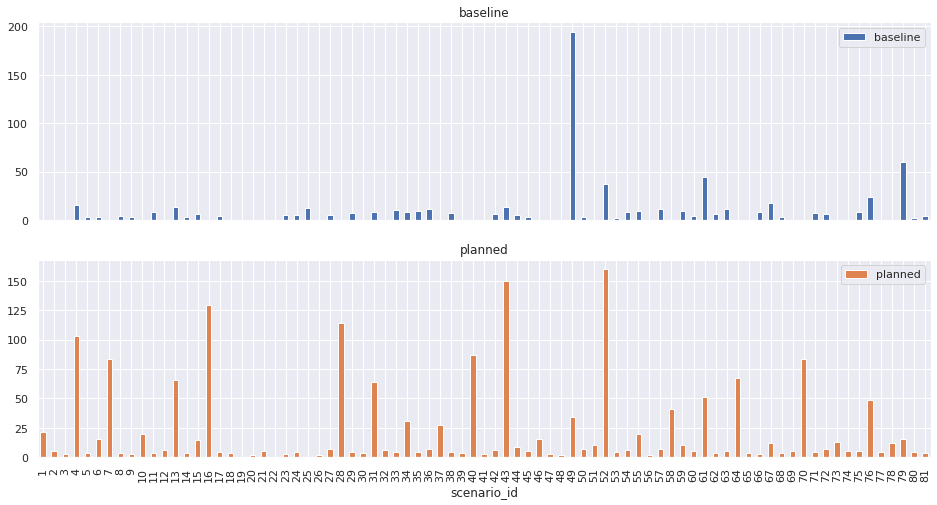

In [19]:
trial_run_df.groupby(["scenario_id", "treatment"])["ttc"].std().unstack().plot.bar(subplots=True, legend=True)

<AxesSubplot:xlabel='scenario_id'>

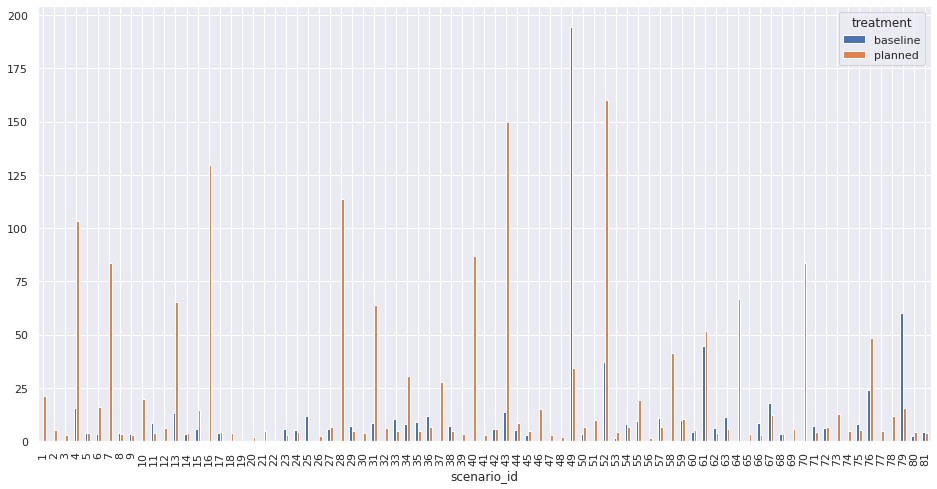

In [20]:
trial_run_df.groupby(["scenario_id", "treatment"])["ttc"].std().unstack().plot.bar(legend=True)

In [21]:
trial_run_df.groupby(["scenario_id", "treatment"])["ttc"].std().unstack()

treatment,baseline,planned
scenario_id,,
1,NaN,21.373245
2,NaN,5.175854
3,NaN,2.778607
4,15.534089,103.473376
5,3.700135,3.793445
...,...,...
77,NaN,4.755962
78,NaN,11.818658
79,60.341103,15.790224


# Plots

## Successes per trial

In [22]:
successes = trial_run_df[trial_run_df.end_state == "success"]
counts = successes.groupby(["scenario_id", "treatment"])["end_state"].count().to_frame().reset_index()

array([<AxesSubplot:title={'center':'baseline'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'planned'}, xlabel='scenario_id'>],
      dtype=object)

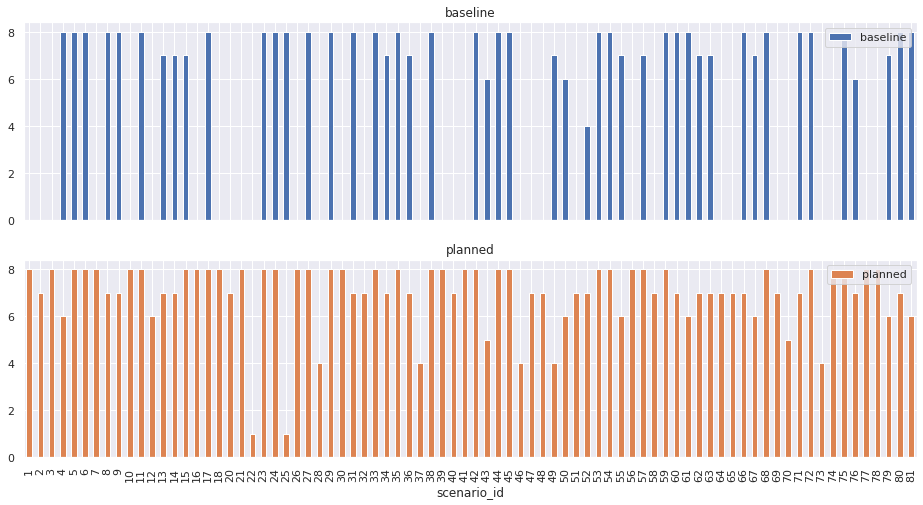

In [23]:
successes.groupby(["scenario_id", "treatment"])["end_state"].count().unstack().plot.bar(subplots=True, legend=True)

## 10 first successes boxplot

In [24]:
both_trials_succcess = successes.groupby(["scenario_id", "treatment"])["end_state"].count().unstack()
both_trials_succcess = both_trials_succcess[(both_trials_succcess.baseline > 0) & (both_trials_succcess.planned > 0)].reset_index()
both_trials_succcess = trial_run_df[trial_run_df['scenario_id'].isin(both_trials_succcess.scenario_id)]
both_trials_succcess

,exec_group,scenario_id,code,executor,ttc,failure_time,end_state,total_time_wall_clock,has_failure,factors_avg_speed,factors_battery_charge,factors_battery_discharge_rate,factors_location,factors_skills,treatment
6,les-01,4,aaabab,turtlebot5,490.72,NaN,success,680.66,False,a,a,a,a,b,baseline
7,les-01,4,aaabap,turtlebot6,331.75,NaN,success,486.47,False,a,a,a,a,b,planned
8,les-01,5,aaabbb,turtlebot6,208.30,NaN,success,296.29,False,a,a,a,b,b,baseline
9,les-01,5,aaabbp,turtlebot6,204.15,NaN,success,315.29,False,a,a,a,b,b,planned
10,les-01,6,aaabcb,turtlebot6,176.85,NaN,success,271.26,False,a,a,a,c,b,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,les-08,79,acccap,turtlebot3,335.07,NaN,success,515.50,False,a,c,c,a,c,planned
1292,les-08,80,acccbb,turtlebot3,430.25,NaN,success,653.62,False,a,c,c,b,c,baseline
1293,les-08,80,acccbp,turtlebot6,211.20,NaN,success,313.30,False,a,c,c,b,c,planned
1294,les-08,81,accccb,turtlebot2,222.02,NaN,success,331.32,False,a,c,c,c,c,baseline


<AxesSubplot:xlabel='scenario_id', ylabel='ttc'>

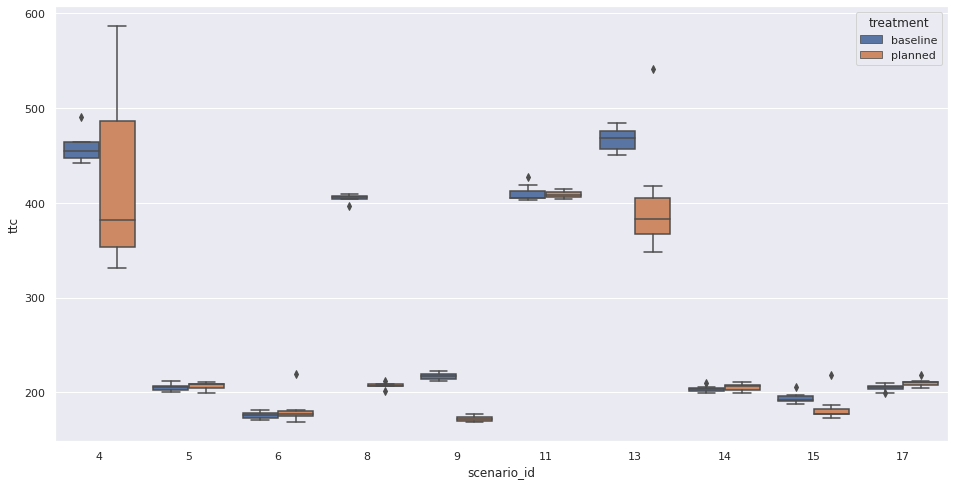

In [27]:
sns.boxplot(x="scenario_id", y="ttc", hue="treatment", data=both_trials_succcess[both_trials_succcess.scenario_id < 20])

### Average time to reach target

array([<AxesSubplot:title={'center':'baseline'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'planned'}, xlabel='scenario_id'>],
      dtype=object)

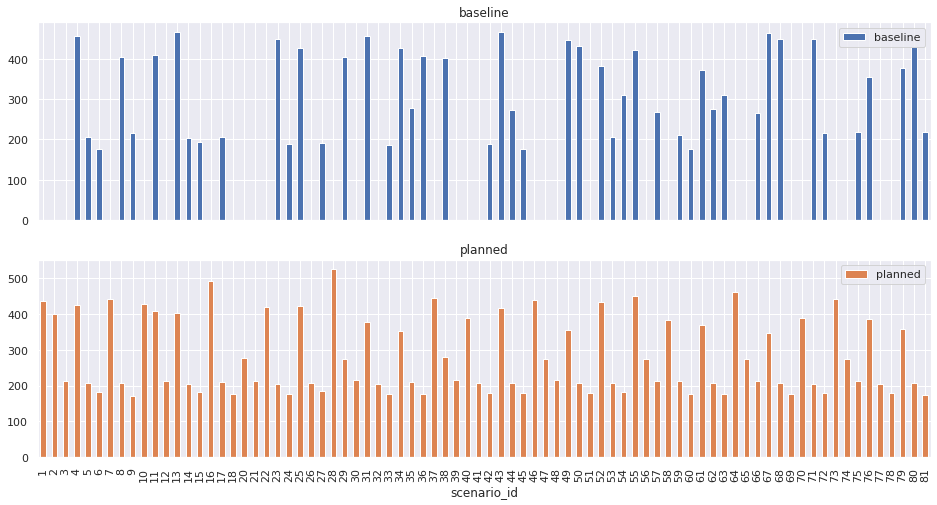

In [28]:
successes.groupby(["scenario_id", "treatment"])["ttc"].mean().unstack().plot.bar(subplots=True, legend=True, figsize=(16,8))

<AxesSubplot:xlabel='scenario_id', ylabel='ttc'>

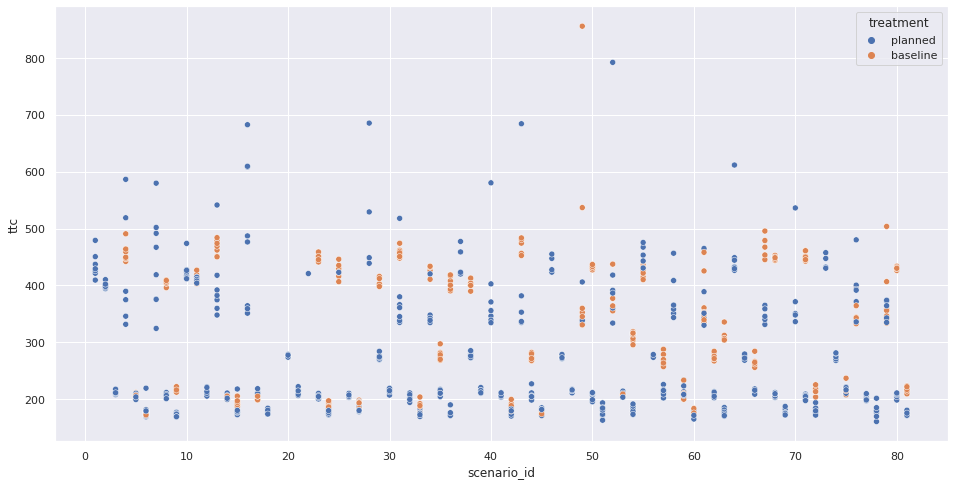

In [29]:
#successes.groupby(["scenario_id", "treatment"])["ttc"].mean().unstack().plot.bar(legend=True, figsize=(16,8))
sns.scatterplot(x="scenario_id", y="ttc", hue="treatment", data=successes)

# Adaptation Space

# Factors

In [30]:
trial_run_df.groupby(["factors_avg_speed", "treatment"])["end_state"].value_counts()

factors_avg_speed  treatment  end_state   
a                  baseline   success         354
                              no-skill        175
                              low-battery      97
                              timeout-sim      18
                              timeout-wall      4
                   planned    success         558
                              timeout-sim      43
                              low-battery      35
                              timeout-wall     12
Name: end_state, dtype: int64

In [31]:
trial_run_df.groupby(["factors_battery_charge", "treatment"])["end_state"].value_counts()

factors_battery_charge  treatment  end_state   
a                       baseline   success         109
                                   low-battery      65
                                   no-skill         38
                                   timeout-sim       2
                                   timeout-wall      2
                        planned    success         184
                                   low-battery      25
                                   timeout-sim       5
                                   timeout-wall      2
b                       baseline   success         117
                                   no-skill         68
                                   low-battery      20
                                   timeout-sim      10
                                   timeout-wall      1
                        planned    success         186
                                   timeout-sim      18
                                   low-battery       6
                 

In [32]:
trial_run_df.groupby(["factors_battery_discharge_rate", "treatment"])["end_state"].value_counts()

factors_battery_discharge_rate  treatment  end_state   
a                               baseline   success         138
                                           no-skill         54
                                           low-battery      17
                                           timeout-sim       5
                                           timeout-wall      2
                                planned    success         195
                                           timeout-sim      11
                                           low-battery       6
                                           timeout-wall      4
b                               baseline   success         114
                                           low-battery      61
                                           no-skill         40
                                           timeout-sim       1
                                planned    success         194
                                           timeout-sim      15

In [33]:
trial_run_df.groupby(["factors_skills", "treatment"])["end_state"].value_counts()

factors_skills  treatment  end_state   
a               baseline   no-skill        120
                           success          54
                           low-battery      34
                           timeout-sim       5
                           timeout-wall      3
                planned    success         181
                           timeout-sim      17
                           low-battery      12
                           timeout-wall      6
b               baseline   success         135
                           no-skill         55
                           low-battery      20
                           timeout-sim       5
                           timeout-wall      1
                planned    success         189
                           low-battery      12
                           timeout-sim      12
                           timeout-wall      3
c               baseline   success         165
                           low-battery      43
                    

In [34]:
trial_run_df.groupby(["factors_location", "treatment"])["end_state"].value_counts()

factors_location  treatment  end_state   
a                 baseline   success          90
                             low-battery      68
                             no-skill         45
                             timeout-sim      11
                             timeout-wall      2
                  planned    success         150
                             low-battery      32
                             timeout-sim      28
                             timeout-wall      6
b                 baseline   success         132
                             no-skill         69
                             low-battery      12
                             timeout-sim       2
                             timeout-wall      1
                  planned    success         204
                             timeout-sim       6
                             timeout-wall      4
                             low-battery       2
c                 baseline   success         132
                           

## Time by factor

<AxesSubplot:xlabel='factors_battery_charge', ylabel='ttc'>

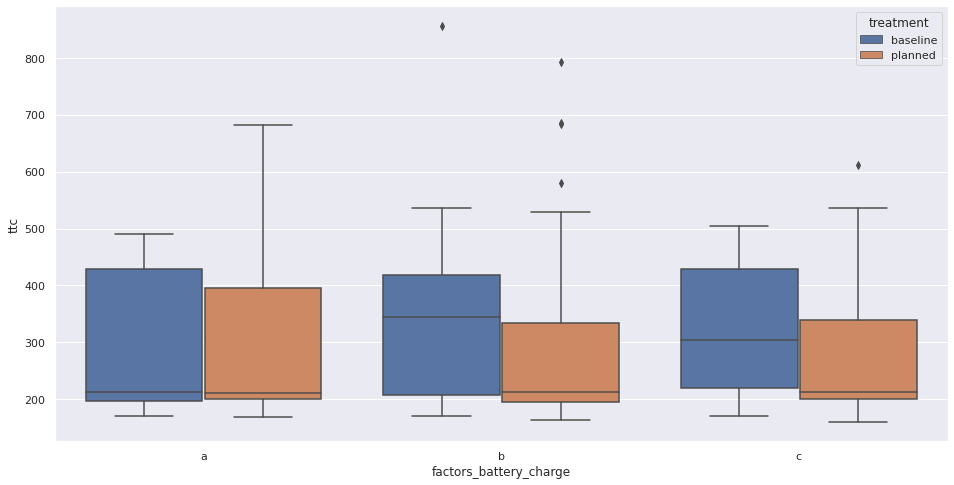

In [35]:
sns.boxplot(x="factors_battery_charge", y="ttc", hue="treatment", data=trial_run_df)

<AxesSubplot:xlabel='factors_battery_discharge_rate', ylabel='ttc'>

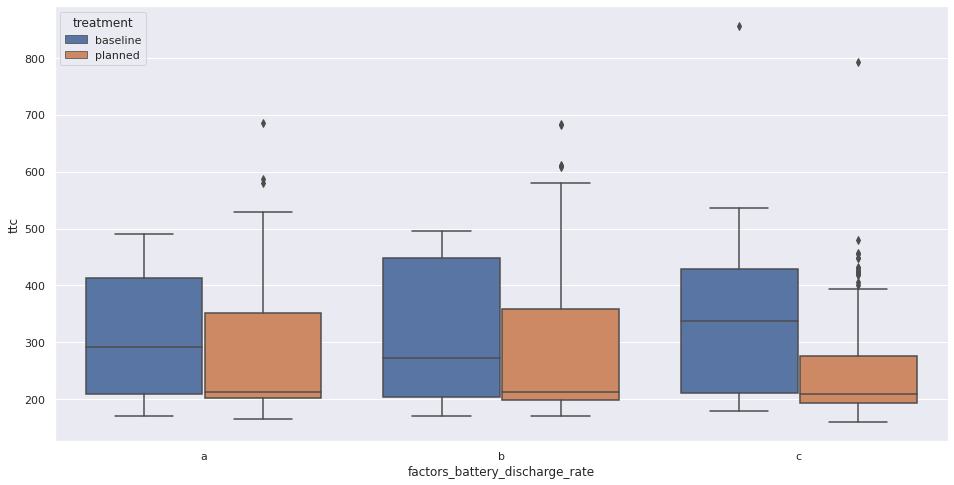

In [36]:
sns.boxplot(x="factors_battery_discharge_rate", y="ttc", hue="treatment", data=trial_run_df)

<AxesSubplot:xlabel='factors_skills', ylabel='ttc'>

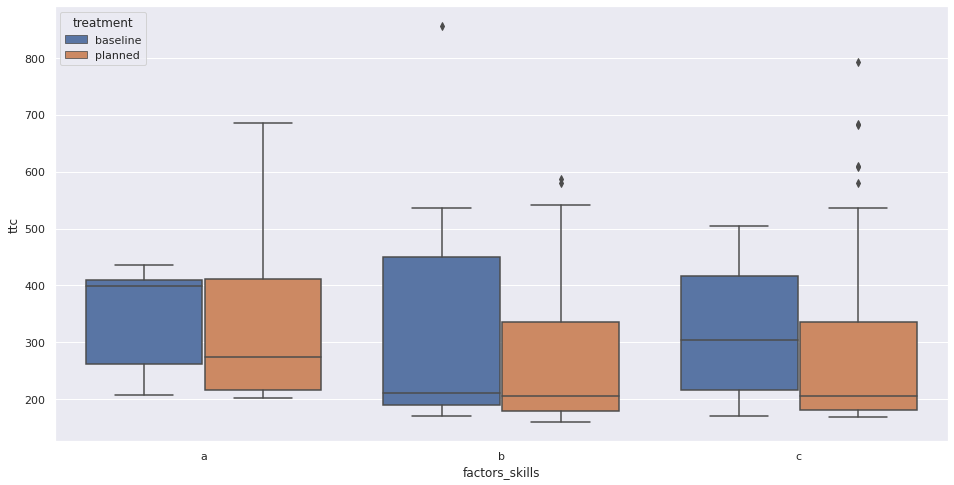

In [37]:
sns.boxplot(x="factors_skills", y="ttc", hue="treatment", data=trial_run_df)

<AxesSubplot:xlabel='factors_location', ylabel='ttc'>

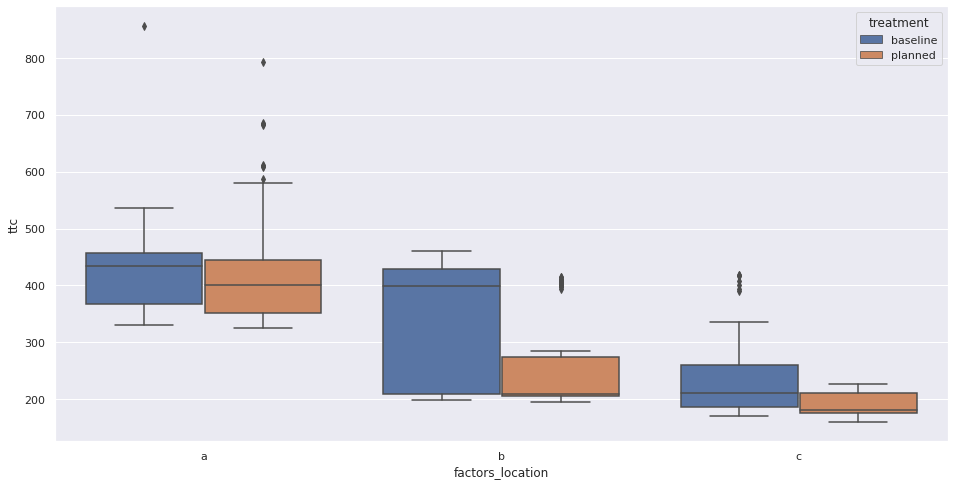

In [38]:
sns.boxplot(x="factors_location", y="ttc", hue="treatment", data=trial_run_df)

# Metrics
## Metric1 - Success

In [39]:
planned_suc = successes[successes.treatment == "planned"].groupby("scenario_id")["end_state"].count()
baseline_suc = successes[successes.treatment == "baseline"].groupby("scenario_id")["end_state"].count()

In [40]:
metric1 = sum(planned_suc)/sum(baseline_suc)
metric1

1.576271186440678

## Metric2 - TTC

In [41]:
planned_ttc = successes[successes.treatment == "planned"].groupby("scenario_id")["ttc"].mean()
baseline_ttc = successes[successes.treatment == "baseline"].groupby("scenario_id")["ttc"].mean()

In [42]:
metric2 = planned_ttc / baseline_ttc
metric2

scenario_id
1          NaN
2          NaN
3          NaN
4     0.927112
5     1.006694
        ...   
77         NaN
78         NaN
79    0.946462
80    0.481131
81    0.805439
Name: ttc, Length: 80, dtype: float64

<AxesSubplot:xlabel='scenario_id'>

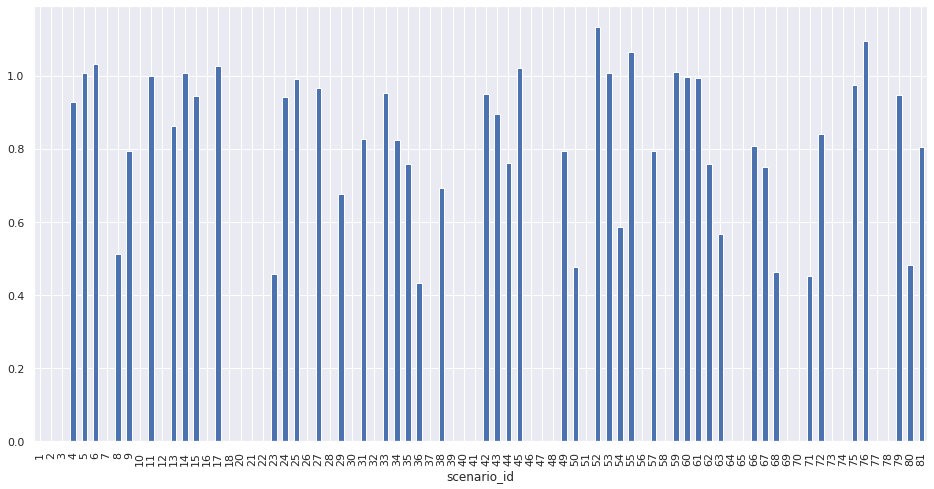

In [43]:
metric2.plot.bar(figsize=(16, 8))

In [44]:
metric2.mean()

0.830693001964429

## Metric 3 - Battery

In [45]:
battery = trial_run_df[trial_run_df.end_state == "low-battery"]
battery.groupby("scenario_id")["end_state"].count()

scenario_id
1      7
4      2
7      8
9      1
10     8
12     8
13     1
15     1
16     8
18     8
19     8
22    15
25     7
26     8
32     1
37     8
40     9
43     5
47     2
49     1
55     3
62     1
64     1
65     1
67     1
70     8
77     1
Name: end_state, dtype: int64

In [46]:
planned_battery = battery[battery.treatment == "planned"].groupby("scenario_id")["end_state"].value_counts()
planned_battery

scenario_id  end_state  
4            low-battery    2
9            low-battery    1
19           low-battery    8
22           low-battery    7
25           low-battery    7
32           low-battery    1
40           low-battery    1
43           low-battery    3
49           low-battery    1
55           low-battery    2
64           low-battery    1
65           low-battery    1
Name: end_state, dtype: int64

In [47]:
baseline_battery = battery[battery.treatment == "baseline"].groupby("scenario_id")["end_state"].value_counts()
baseline_battery

scenario_id  end_state  
1            low-battery    7
7            low-battery    8
10           low-battery    8
12           low-battery    8
13           low-battery    1
15           low-battery    1
16           low-battery    8
18           low-battery    8
22           low-battery    8
26           low-battery    8
37           low-battery    8
40           low-battery    8
43           low-battery    2
47           low-battery    2
55           low-battery    1
62           low-battery    1
67           low-battery    1
70           low-battery    8
77           low-battery    1
Name: end_state, dtype: int64

In [48]:
metric3 = sum(planned_battery) / sum(baseline_battery)
metric3

0.36082474226804123

# Metric 4 Utility

In [81]:
suc_by_scenario_treatment = successes.groupby(["scenario_id", "treatment"])["end_state"].count().unstack()
metric4 = 0
for scen_id, scen_suc in suc_by_scenario_treatment.iterrows():
    if scen_suc.planned >= 1 and np.isnan(scen_suc.baseline):
        metric4 += 1
    elif metric2[scen_id] < 1:
        metric4 += 1
metric4

70

# T-test

In [51]:
stats.ttest_ind(successes[successes.treatment == "planned"]['ttc'], successes[successes.treatment == "baseline"]['ttc'])

Ttest_indResult(statistic=-6.773231273520563, pvalue=2.2579375138455955e-11)

In [52]:
stats.ttest_ind(counts[counts.treatment == "planned"]['end_state'], counts[counts.treatment == "baseline"]['end_state'])

Ttest_indResult(statistic=-2.3977225599090835, pvalue=0.017976567965261335)

## TTC Distribution

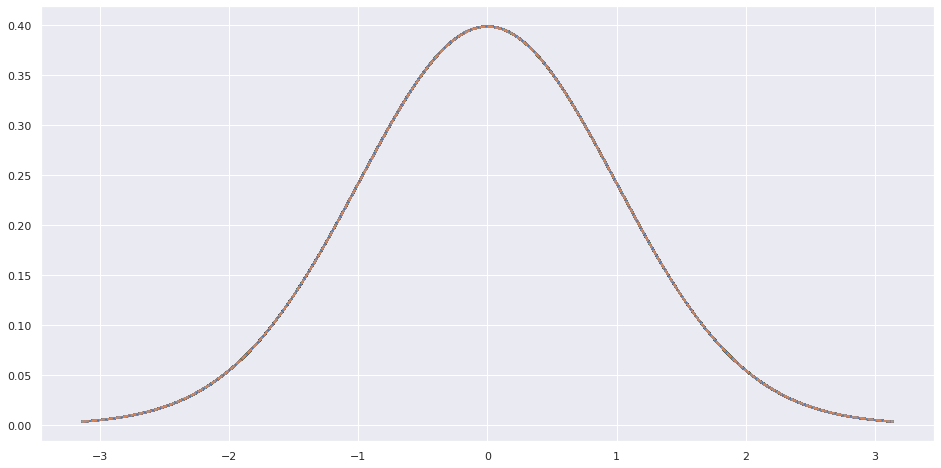

In [53]:
pdist = stats.t(successes[successes.treatment == "planned"]['ttc'])
bdist = stats.t(successes[successes.treatment == "baseline"]['ttc'])
x1 = np.linspace(pdist.ppf(0.001), pdist.ppf(0.999), 1000)
x2 = np.linspace(bdist.ppf(0.001), bdist.ppf(0.999), 1000)
plt.plot(x1, pdist.pdf(x1), '-')
plt.plot(x2, bdist.pdf(x2), '--')
pass

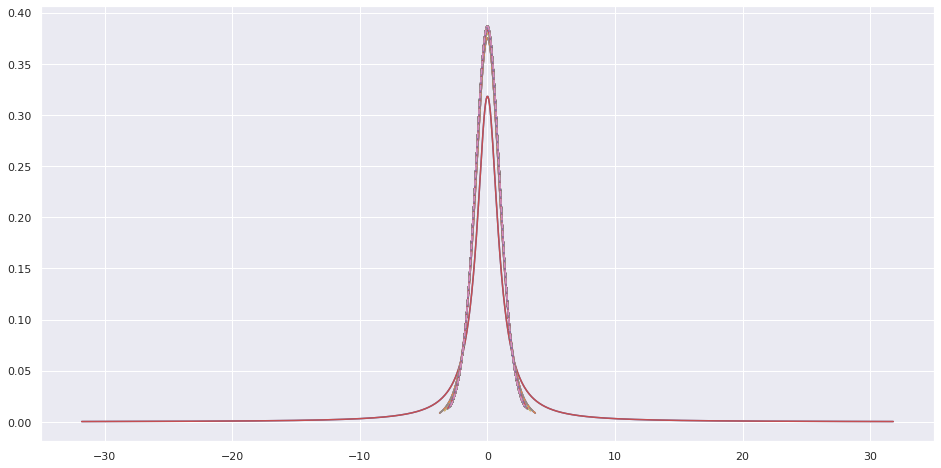

In [54]:
pdist = stats.t(counts[counts.treatment == "planned"]['end_state'])
bdist = stats.t(counts[counts.treatment == "baseline"]['end_state'])
x1 = np.linspace(pdist.ppf(0.01), pdist.ppf(0.99), 1000)
x2 = np.linspace(bdist.ppf(0.01), bdist.ppf(0.99), 1000)
plt.plot(x1, pdist.pdf(x1), '-')
plt.plot(x2, bdist.pdf(x2), '--')
pass